THIS PROJECT AIMS TO PREDICT THE PRICE OF A CAR BASED ON A NUMBER OF ATTRIBUTES.
THE ATTRIBUTES ARE:
1. year: Year of the car.
2. make: Manufacturer of the car.
3. model: Specific model of the car.
4. trim: Trim level of the car.
5. body: Body type of the car (e.g., SUV, Sedan).
6. transmission: Type of transmission (e.g., automatic).
7. vin: Vehicle Identification Number.
8. state: Location (state) where the car is located.
9. condition: Condition rating of the car.
10. odometer: Mileage of the car.
11. color: Exterior color of the car.
12. interior: Interior color of the car.
13. seller: Seller details.
14. mmr: Market valuation of the car.
15. sellingprice: Price at which the car was sold.
16. saledate: date of sale.

THE PRICES WILL BE PREDICTED AFTER THE DATA CLEANING ANd PRE-PROCESSING. VARIOUS REGRESSION MODELS WILL BE USED TO CHECK WHICH MODEL GIVES HIGHEST ACCURACY RATE.FUTHERMORE, THAT MODEL WILL BE USED TO PREDICT A RANDOM SET OF VALUES FROM THE DATASET. VISUALIZATION WILL BE DONE USING THE EXISTING FEATURES TO GET INSIGHTS ABOUT THE DATA.

## **IMPORTING LIBRARIES AND DISPLAYING BASIC INFORMATION**

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import random

In [ ]:
#reading dset
d = pd.read_csv("car_prices.csv", encoding="latin-1")
d.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
#some basic information about the data
d.shape

(558837, 16)

In [ ]:
if d.duplicated().any():
  print("There are duplicates")
else:
  print("There are no duplicates")
d.drop_duplicates(keep=False,inplace=True)
d.shape

There are no duplicates


(558837, 16)

In [ ]:
d.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532390 entries, 0 to 532389
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          532390 non-null  int64  
 1   make          522660 non-null  object 
 2   model         522570 non-null  object 
 3   trim          522321 non-null  object 
 4   body          519777 non-null  object 
 5   transmission  470567 non-null  object 
 6   vin           532386 non-null  object 
 7   state         532389 non-null  object 
 8   condition     520573 non-null  float64
 9   odometer      532297 non-null  float64
 10  color         531671 non-null  object 
 11  interior      531671 non-null  object 
 12  seller        532389 non-null  object 
 13  mmr           532356 non-null  float64
 14  sellingprice  532379 non-null  float64
 15  saledate      532379 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 65.0+ MB


# **KEY INSIGHTS**

*Which makes/models have the highest demand and selling price?

*Which are the top 10 most popular vehicle makes? (Bar plot, Count plot)

*What are the most common transmission types? (Pie chart, Count plot)

*Who are the top sellers by volume? (Bar plot)

*Are there any outliers in selling prices? (Boxplot, Histogram)

*which cars were sold the most?


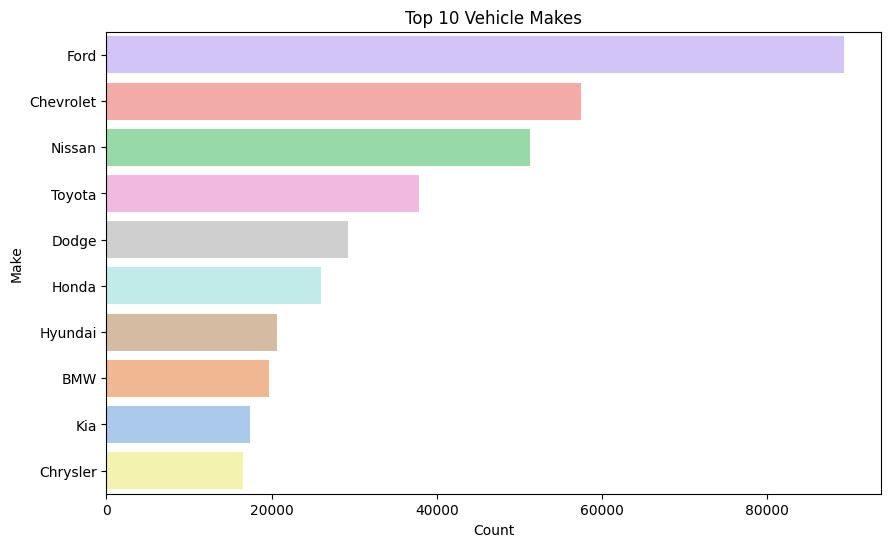

In [ ]:
top_makes = d['make'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=d[d['make'].isin(top_makes)], order=top_makes, palette='pastel', hue='make', legend=False)
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

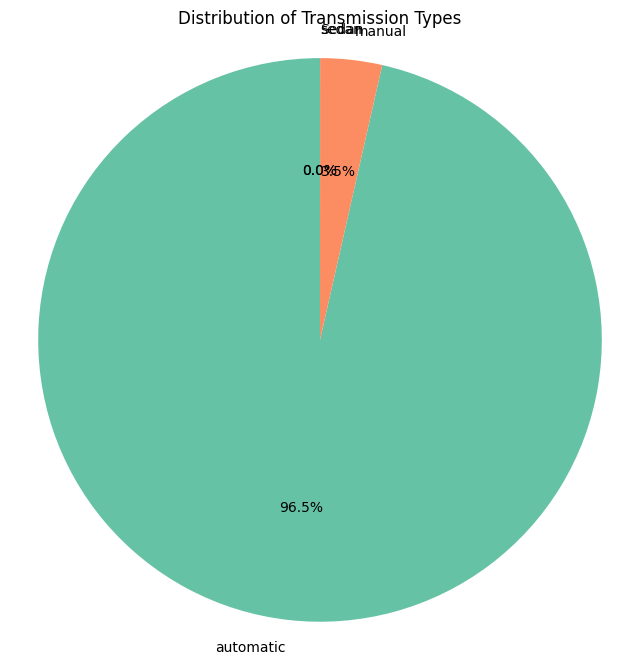

In [ ]:
transmission_counts = d['transmission'].value_counts()

# Pie chart for transmission types
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(transmission_counts)))
plt.title('Distribution of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

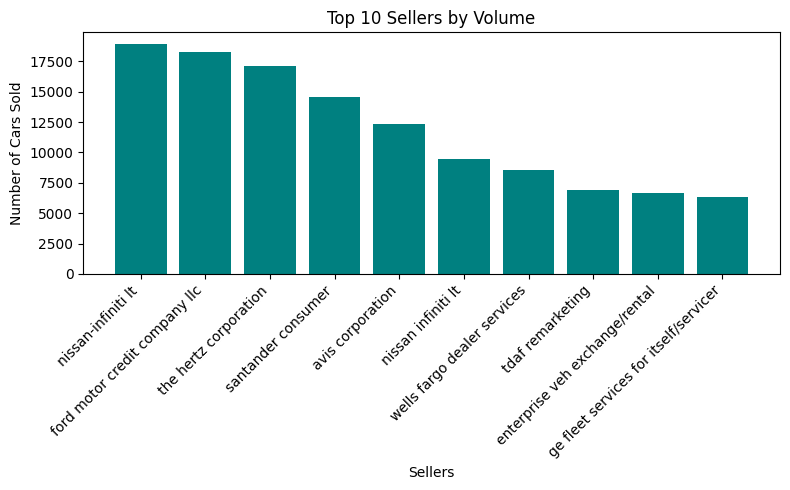

In [ ]:
# Count the number of sales by each seller
top_sellers = d['seller'].value_counts().head(10)

# Plot the d
plt.figure(figsize=(8, 5))
plt.bar(top_sellers.index, top_sellers.values, color='teal')
plt.title('Top 10 Sellers by Volume')
plt.xlabel('Sellers')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


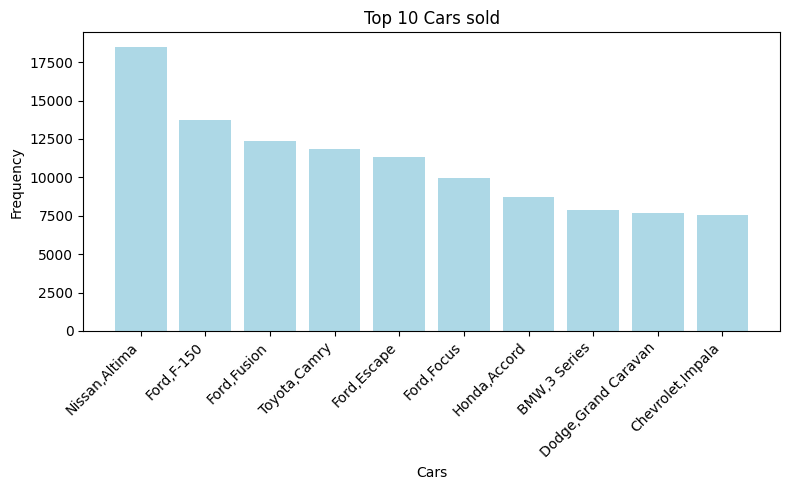

In [ ]:
d['brand_model'] = d['make'] + ',' + d['model']

# Count the number of sales by each seller
top_sellers = d['brand_model'].value_counts().head(10)

# Plot the d
plt.figure(figsize=(8, 5))
plt.bar(top_sellers.index, top_sellers.values, color='lightblue')
plt.title('Top 10 Cars sold')
plt.xlabel('Cars')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **DATA CLEANING AND PRE-PROCESSING (EDA)**

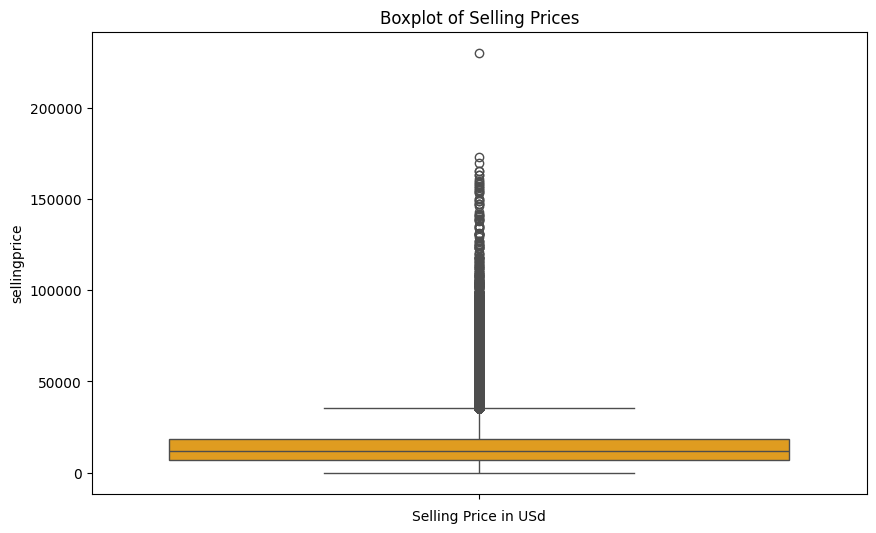

In [ ]:
#Understanding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(d['sellingprice'], color='orange')
plt.title('Boxplot of Selling Prices')
plt.xlabel('Selling Price in USd')
plt.show()



**In this chart, there are many selling prices far above the upper whisker, indicating a significant number of vehicles with unusually high prices.**


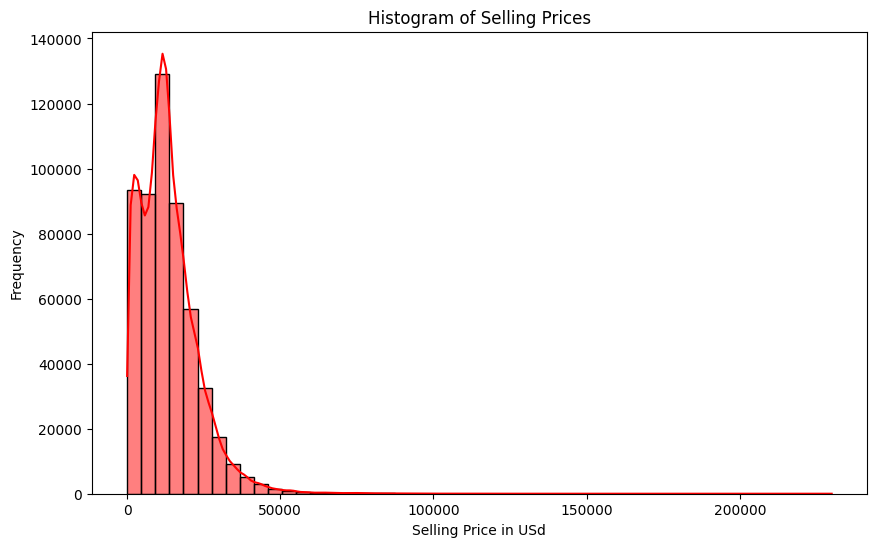

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(d['sellingprice'], bins=50, kde=True, color='red')
plt.title('Histogram of Selling Prices')
plt.xlabel('Selling Price in USd')
plt.ylabel('Frequency')
plt.show()


**The histogram shows a right-skewed distribution, meaning most vehicles are sold at lower price ranges, and fewer vehicles are sold at higher price ranges.**

**The long tail extending to the right suggests the presence of high-priced vehicles (luxury or premium models).**

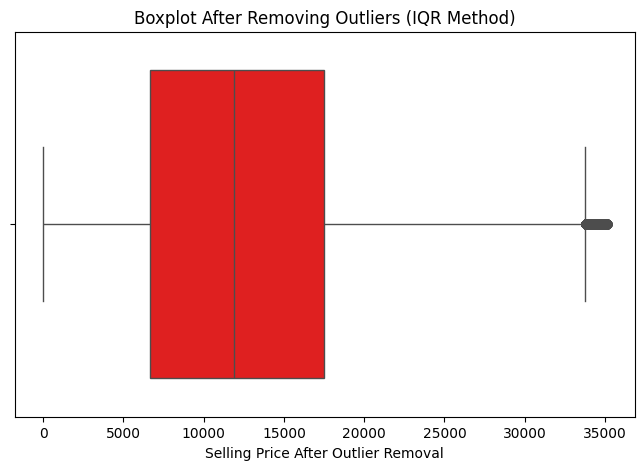

In [ ]:
#IQR method
Q1 = d["sellingprice"].quantile(0.25)
Q3 = d["sellingprice"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

d = d[(d["sellingprice"] >= lower_bound) & (d["sellingprice"] <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(x=d["sellingprice"], color="red")
plt.title("Boxplot After Removing Outliers (IQR Method)")
plt.xlabel("Selling Price After Outlier Removal")
plt.show()

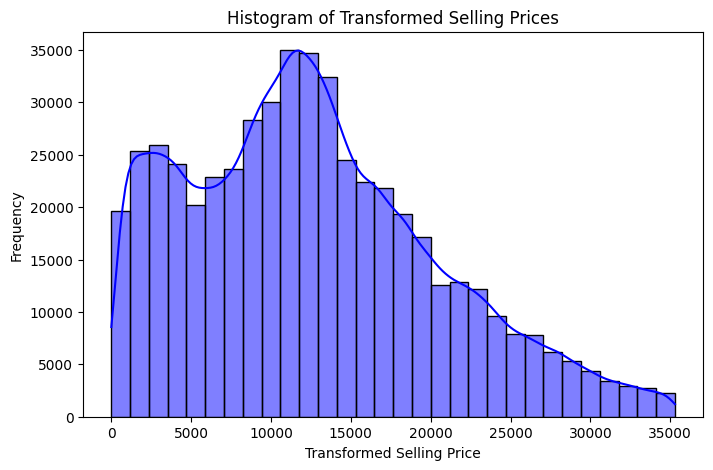

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(d['sellingprice'], bins=30, kde=True, color="blue")

plt.xlabel("Transformed Selling Price")
plt.ylabel("Frequency")
plt.title("Histogram of Transformed Selling Prices")
plt.show()

In [ ]:
d.shape

(517528, 17)

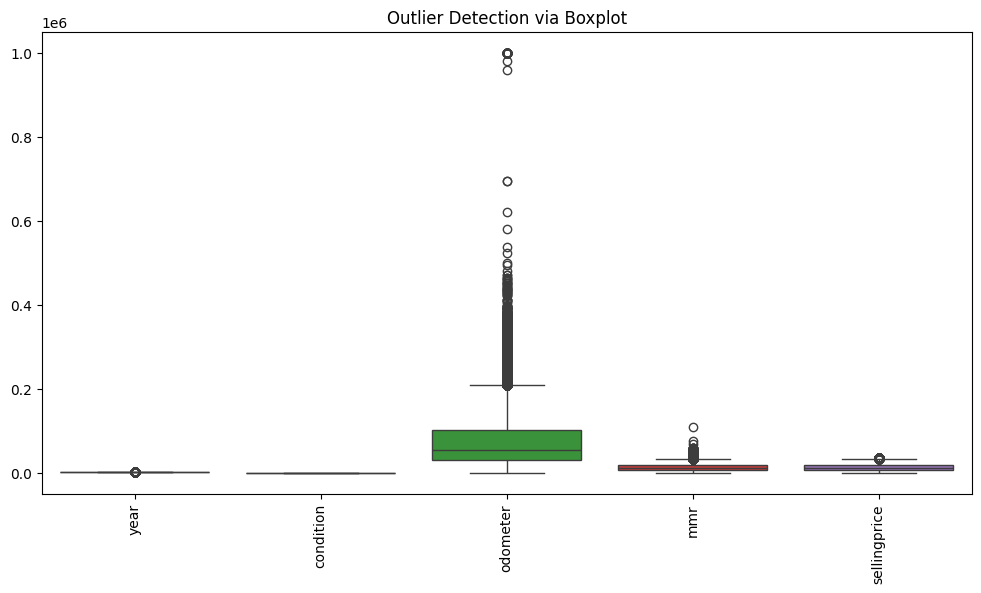

In [ ]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=d.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Outlier Detection via Boxplot")
plt.show()

In [ ]:
d.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [ ]:
#d pre-processing----finding out the total null values in each column
d.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [ ]:
#dropping unwanted features
d=d.drop(['vin','saledate'],axis=1)
d.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [ ]:
#coverting columns like Profession and gender into numercial data
le=LabelEncoder()
for column in d.columns:
    if d[column].dtype == 'object':
        d[column] = le.fit_transform(d[column])
d.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,24,658,998,36,1,29,5.0,16639.0,43,1,7202,20500.0,21500.0
1,2015,24,658,998,36,1,29,5.0,9393.0,43,0,7202,20800.0,21500.0
2,2014,3,11,283,37,1,29,45.0,1331.0,33,1,4978,31900.0,30000.0
3,2015,51,596,1399,37,1,29,41.0,14282.0,43,1,13795,27500.0,27750.0
4,2014,3,44,498,37,1,29,43.0,2641.0,33,1,4978,66000.0,67000.0


In [ ]:
#replacing null values
for column in d.columns:
    if d[column].isnull().any():
        d[column] = d[column].fillna(d[column].mean())

In [ ]:
#checking the total null values in each column
d.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
state,0
condition,0
odometer,0
color,0


# **DIVISION OF DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
#independent features
x=d.iloc[:,0:12]
#x = x["make", "model", "year", "odometer", "condition", "state"]
x.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller
0,2015,24,658,998,36,1,29,5.0,16639.0,43,1,7202
1,2015,24,658,998,36,1,29,5.0,9393.0,43,0,7202
2,2014,3,11,283,37,1,29,45.0,1331.0,33,1,4978
3,2015,51,596,1399,37,1,29,41.0,14282.0,43,1,13795
4,2014,3,44,498,37,1,29,43.0,2641.0,33,1,4978


In [ ]:
x.dtypes

,0
year,int64
make,int64
model,int64
trim,int64
body,int64
transmission,int64
state,int64
condition,float64
odometer,float64
color,int64


In [ ]:
# dependent features
y = d["sellingprice"]
y = y.to_numpy().ravel()  # This will convert y to a 1D array

# **APPLICATION OF REGRESSION MODELS AND FINDING THE MODEL WITH HIGHEST ACCURACY**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
y_train = y_train.ravel()  # In case y_train is a pandas Series or DataFrame
y_train.shape
print(type(y_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.series.Series'>


<class 'numpy.ndarray'>


In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
lr = r2_score(y_test, y_pred)
print("Accuracy for LinearRegression model: ",lr)

Accuracy for LinearRegression model:  0.4998752702472923


In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
dt = r2_score(y_test, y_pred)
print("Accuracy for DecisionTreeRegressor model: ",dt)

Accuracy for DecisionTreeRegressor model:  0.8866087127227937


In [ ]:
# Train Model
model3 = RandomForestRegressor(n_estimators=40)
model3.fit(x_train, y_train)  # No warning now
y_pred = model3.predict(x_test)

# Evaluate Model
from sklearn.metrics import r2_score
rf_score = r2_score(y_test, y_pred)
print("Random Forest R² Score:", rf_score)



Random Forest R² Score: 0.9409743472048766


In [ ]:
model4= KNeighborsRegressor()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
knn = r2_score(y_test, y_pred)
print("Accuracy for KNeighborsRegressor model: ",knn)

Accuracy for KNeighborsRegressor model:  0.5389568118758328


In [ ]:
model5= Ridge(alpha=1.0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)
r = r2_score(y_test, y_pred)
print("Accuracy for Ridge model: ",r)

Accuracy for Ridge model:  0.49987527082516703


In [ ]:
model6 = Lasso(alpha=0.1)
model6.fit(x_train, y_train)
y_pred = model6.predict(x_test)
l = r2_score(y_test, y_pred)
print("Accuracy for Lasso model: ",l)

Accuracy for Lasso model:  0.49987524825847174


In [ ]:
model7 = ElasticNet(alpha=0.1, l1_ratio=0.5)
model7.fit(x_train, y_train)
y_pred = model7.predict(x_test)
e = r2_score(y_test, y_pred)
print("Accuracy for ElasticNet model: ",e)

Accuracy for ElasticNet model:  0.499882003959884


In [ ]:
models = {
    "Linear Regression": lr,
    "Ridge Regression": r,
    "Lasso Regression":l,
    "ElasticNet Regression": e,
    "decision Tree Regressor": dt,
    "Random Forest Regressor": rf,
    "K-Neighbors Regressor": knn
}

# Create dFrame and sort by R^2 Score
results_df = pd.DataFrame(models.items(), columns=["Model", "R^2 Score"])
results_df = results_df.sort_values(by="R^2 Score", ascending=False).reset_index(drop=True)

print(results_df)

                     Model  R^2 Score
0  Random Forest Regressor   0.941073
1  decision Tree Regressor   0.882334
2    K-Neighbors Regressor   0.538957
3    ElasticNet Regression   0.499882
4         Ridge Regression   0.499875
5        Linear Regression   0.499875
6         Lasso Regression   0.499875


# **UNDERSTANDING OVERFITTING AND UNDERFITTING**

In [ ]:
#overfitting and underfitting
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

# Training set performance
train_r2 = r2_score(y_train, y_train_pred)

# Testing set performance
test_r2 = r2_score(y_test, y_test_pred)

# Calculate MAE, MSE, RMSE, Adjusted R²
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Calculate Adjusted R²
n_train = len(y_train)  # Number of training samples
p = x_train.shape[1]  # Number of features

adj_r2_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - p - 1)

# Create a dictionary with all the metrics
metrics = {
    "Metric": ["R² Score",  "MAE", "MSE", "RMSE", "Adjusted R²"],
    "Training Score": [train_r2,  mae_train, mse_train, rmse_train, adj_r2_train],
    "Testing Score": [test_r2,  mae_test, mse_test, rmse_test, adj_r2_test]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

# Display the table
print("\nModel Performance Metrics:")
print(df)



Model Performance Metrics:
        Metric  Training Score  Testing Score
0     R² Score        0.991066   9.410728e-01
1          MAE      461.588141   1.210690e+03
2          MSE   539670.572749   3.551007e+06
3         RMSE      734.622742   1.884411e+03
4  Adjusted R²        0.991065   9.410663e-01


# **TESTING DATA WITH THE MOST SUITABLE MODEL**

In [ ]:
# @title Default title text
#testing the algorithm
random_indices = random.sample(range(len(x)), k=5)
new_df = pd.DataFrame(x.iloc[random_indices])
predicted_values = model2.predict(new_df)
new_df['predicted_price'] = predicted_values
print(new_df)

        year  make  model  trim  body  transmission  state  condition  \
77606   2006    49    541  1029    36             1     40  37.000000   
283551  2013    20    307   808    19             4     45  43.000000   
18768   2007    33    538  1150    43             1     57  30.672365   
242474  2012    24    297   998    37             1     50  41.000000   
209288  2012     3    743  1949    36             1     29  34.000000   

        odometer  color  interior  seller  predicted_price  
77606   154152.0     27         6    7046           7200.0  
283551    7924.0     41         1    9239          22500.0  
18768    83112.0     27         1    7300          10000.0  
242474   12344.0     41        13    2154           8500.0  
209288   48651.0     33         1    4984          34000.0  


In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
d= pd.read_csv("car_prices.csv", encoding="latin-1")
# Assuming your data frame is 'd' and the categorical columns are listed
categorical_features = ["make", "model", "trim", "body", "transmission", "state", "color", "interior", "seller"]

# Create an empty dictionary to store the encoders
encoders = {}

# Loop over the categorical features and apply LabelEncoder
for feature in categorical_features:
    encoder = LabelEncoder()

    # Fit the encoder and transform the feature
    d[feature] = encoder.fit_transform(d[feature])

    # Save the encoder to the dictionary
    encoders[feature] = encoder

# Save all the encoders using pickle
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

# Now, you can load this file and use the encoders for later use


In [ ]:
import pickle

# Assuming `encoders` is your dictionary of LabelEncoders
with open('/content/label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)
from google.colab import files
files.download('/content/label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save cleaned encoders
import pickle
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(model3, f)

print("Model saved successfully!")
files.download("car_price_model.pkl")

Model saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>